In [19]:
import pandas as pd

# Load the adrenal response data from the text file
# comment='!' tells it to ignore the metadata lines at the top
adrenal_df = pd.read_csv('adrenal_response.txt', sep='\t', comment='!', index_col=0)

# Display the first few rows to see the data structure
print(adrenal_df.head())

# Display the column names (these are the sample IDs)
print("\n Sample IDs (Columns)")
print(adrenal_df.columns)

                   GSM3484602  GSM3484603  GSM3484604  GSM3484605  GSM3484606  \
ID_REF                                                                          
AFFX-BkGr-GC03_st     3.27066     3.31200     3.18169     3.21354     3.29282   
AFFX-BkGr-GC04_st     3.12084     3.17299     3.09865     3.09633     3.07099   
AFFX-BkGr-GC05_st     3.18279     3.25270     3.18130     3.14723     3.14178   
AFFX-BkGr-GC06_st     3.20216     3.27489     3.18704     3.18796     3.14869   
AFFX-BkGr-GC07_st     3.23294     3.30020     3.20933     3.19129     3.16329   

                   GSM3484607  GSM3484608  GSM3484609  GSM3484610  GSM3484611  \
ID_REF                                                                          
AFFX-BkGr-GC03_st     3.28525     3.21264     3.17590     3.24442     3.12095   
AFFX-BkGr-GC04_st     3.07717     3.00509     3.00040     2.99187     3.01144   
AFFX-BkGr-GC05_st     3.18366     3.06522     3.04224     3.05482     3.06578   
AFFX-BkGr-GC06_st     3.192

In [ ]:
import pandas as pd
import numpy as np

# Define the mapping from sample ID to experimental condition
condition_map = {
    'GSM3484602': 'Germ-Free', 'GSM3484603': 'Germ-Free', 'GSM3484604': 'Germ-Free',
    'GSM3484605': 'Germ-Free', 'GSM3484606': 'Germ-Free', 'GSM3484607': 'Germ-Free',
    'GSM3484608': 'Control', 'GSM3484609': 'Control', 'GSM3484610': 'Control',
    'GSM3484611': 'Control', 'GSM3484612': 'Control', 'GSM3484613': 'Control'
}

# Transpose the DataFrame so samples are rows and genes are columns
adrenal_df_T = adrenal_df.T

# Add the 'Condition' column to the transposed DataFrame
adrenal_df_T['Condition'] = adrenal_df_T.index.map(condition_map)

# Filter out the non-gene control probes
# Get a list of all column names that start with "AFFX-"
control_probes = [col for col in adrenal_df_T.columns if str(col).startswith('AFFX-')]

# Drop these columns from our analysis
analysis_df = adrenal_df_T.drop(columns=control_probes)

# Display the first few rows of our cleaned and labeled data
print("--- Cleaned Data Ready for Analysis ---")
print(analysis_df.head())

--- Cleaned Data Ready for Analysis ---
ID_REF      ERCCmix1step1  ERCCmix1step10  ERCCmix1step11  ERCCmix1step12  \
GSM3484602        4.91176         4.19960         6.51193         3.64987   
GSM3484603        4.88411         4.20465         6.61606         3.71494   
GSM3484604        4.78118         4.19743         6.37561         3.73899   
GSM3484605        4.87591         4.28283         6.54420         3.97936   
GSM3484606        4.77013         4.53338         6.62821         3.75347   

ID_REF      ERCCmix1step13  ERCCmix1step14  ERCCmix1step15  ERCCmix1step16  \
GSM3484602         4.54586         4.65141         3.69462         3.36749   
GSM3484603         4.54023         4.66076         3.77107         3.59625   
GSM3484604         4.21896         4.60910         3.74891         3.49612   
GSM3484605         4.28710         4.67573         3.65761         3.51842   
GSM3484606         4.28301         4.67480         3.81661         3.56018   

ID_REF      ERCCmix1step17  

In [86]:

# 1. Separate the data into the two experimental groups
germ_free_group = analysis_df[analysis_df['Condition'] == 'Germ-Free']
control_group = analysis_df[analysis_df['Condition'] == 'Control']

# 2. Calculate the Fold Change for each gene
results_list = []
pseudocount = 1e-6 # A very small number for gene expression data

# Loop through each gene (all columns except the 'Condition' column)
for gene in analysis_df.drop(columns=['Condition']).columns:
    # Calculate the mean (average) for each group
    mean_germ_free = germ_free_group[gene].mean()
    mean_control = control_group[gene].mean()

    # Calculate Fold Change
    # We add a pseudocount to avoid division by zero
    fold_change = (mean_germ_free + pseudocount) / (mean_control + pseudocount)

    # Store the results
    results_list.append({
        'Gene': gene,
        'mean_germ_free': mean_germ_free,
        'mean_control': mean_control,
        'fold_change': fold_change
    })

# 3. Create a DataFrame to view and sort the results
gene_results_df = pd.DataFrame(results_list)

# --- 4. Display the Most Significant Results ---

print("--- Top 10 UPREGULATED Genes (More Active in Germ-Free Mice) ---")
# Sort by fold_change in descending order to see the largest increases
print(gene_results_df.sort_values(by='fold_change', ascending=False).head(10))

print("\n--- Top 10 DOWNREGULATED Genes (Less Active in Germ-Free Mice) ---")
# Sort by fold_change in ascending order to see the largest decreases
print(gene_results_df.sort_values(by='fold_change', ascending=True).head(10))

NameError: name 'analysis_df' is not defined

Original results table has 28815 rows.
After comprehensive filtering, the results table has 22142 rows.

--- Top 10 UPREGULATED Genes (Fully Cleaned) ---
                    Gene  mean_germ_free  mean_control  fold_change
23070  TC1200001956.mm.2        6.939345      5.205068     1.333190
11709  TC0400003584.mm.2        8.069283      6.323672     1.276044
13427  TC0600000577.mm.2        7.126158      5.598685     1.272827
18203  TC0900001892.mm.2        7.154617      5.625485     1.271822
25614  TC1500001982.mm.2        7.905598      6.298103     1.255235
20375  TC1000001593.mm.2        6.790628      5.421950     1.252433
24844  TC1400002297.mm.2        7.549767      6.108957     1.235852
10249  TC0300002111.mm.2        5.586770      4.529957     1.233294
13631  TC0600001244.mm.2        6.792978      5.526073     1.229259
14937  TC0700001192.mm.2        5.180637      4.240723     1.221640

--- Top 10 DOWNREGULATED Genes (Fully Cleaned) ---
                    Gene  mean_germ_free  mean

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Part 1: Full Data Preparation (to ensure cleaned_results_df is available) ---

# This assumes 'analysis_df' is in your environment
germ_free_group = analysis_df[analysis_df['Condition'] == 'Germ-Free']
control_group = analysis_df[analysis_df['Condition'] == 'Control']
results_list = []
pseudocount = 1e-6
for gene in analysis_df.drop(columns=['Condition']).columns:
    mean_germ_free = germ_free_group[gene].mean()
    mean_control = control_group[gene].mean()
    fold_change = (mean_germ_free + pseudocount) / (mean_control + pseudocount)
    results_list.append({'Gene': gene, 'fold_change': fold_change})
gene_results_df = pd.DataFrame(results_list)

# Comprehensive filtering
is_control_probe = (
    gene_results_df['Gene'].str.contains('AFFX') |
    gene_results_df['Gene'].str.contains('-neg-') |
    gene_results_df['Gene'].str.contains('-pos-') |
    gene_results_df['Gene'].str.contains('ERCC') |
    gene_results_df['Gene'].str.contains('TSUnmapped')
)
cleaned_results_df = gene_results_df[~is_control_probe]

# --- Part 2: Rename Genes Using Your Annotations ---

# *** EDIT THIS DICTIONARY ***
# Add the Probe IDs and their matching Gene Symbols that you find in the GEO database.
id_to_gene_map = {
    # Upregulated Genes
    'TC1200001956.mm.2': 'Rab15',
    'TC0400003584.mm.2' : 'Hpca',
    'TC0600000577.mm.2'	: 'Gpnmb',
    'TC0900001892.mm.2': 'Elav13',
    'TC1500001982.mm.2' : 'Sult4A1',
    'TC1000001593.mm.2': 'Timeless',
    'TC1400002297.mm.2' : 'Nefm',
    'TC0300002111.mm.2'	: 'Shox2',
    'TC0600001244.mm.2' : 'Cpne9',
    'TC0700001192.mm.2' : 'Mex3b',


    # Downregulated Genes
    'TC0600000878.mm.2' :	'Reg1',
    'TC0800000919.mm.2' :	'Ucp1' ,
    'TC1100003919.mm.2' :	'Gh' ,
    'TC0100000806.mm.2' :	'Akp3' ,
    'TC1600000479.mm.2' :	'Muc13',
    'TC0400002770.mm.2' :	'Mup19',
    'TC0400004210.mm.2' :	'Mup8',
    'TC0400002769.mm.2' :	'Mup13',
    'TC0400004212.mm.2' :	'Mup12',
    'TC0400004213.mm.2' :	'Gm2083'

}

# Apply this mapping to create a new 'Gene_Symbol' column
cleaned_results_df['Gene_Symbol'] = cleaned_results_df['Gene'].map(id_to_gene_map)


# --- Part 3: Prepare Data for the Bar Graph ---

# Get the top 10 up and down genes
top_10_up = cleaned_results_df.sort_values(by='fold_change', ascending=False).head(10)
top_10_down = cleaned_results_df.sort_values(by='fold_change', ascending=True).head(10)
plot_df = pd.concat([top_10_up, top_10_down])

# Calculate Log2 Fold Change
plot_df['log2_fold_change'] = np.log2(plot_df['fold_change'])

# If a gene wasn't in your map, it will have a blank name.
# We'll fill it back in with the original ID so it still appears on the plot.
plot_df['Gene_Symbol'].fillna(plot_df['Gene'], inplace=True)

# Sort for a nice, ordered plot
plot_df = plot_df.sort_values(by='log2_fold_change', ascending=False)


# --- Part 4: Create the Final Bar Graph ---

# Create colors for up/down regulation
colors = ['red' if x > 0 else 'blue' for x in plot_df['log2_fold_change']]

plt.figure(figsize=(15, 8))
# Use the new 'Gene_Symbol' for the labels
plt.bar(plot_df['Gene_Symbol'], plot_df['log2_fold_change'], color=colors)

plt.axhline(0, color='grey', linewidth=0.8)
plt.title('Top Differentially Expressed Genes in Germ-Free vs. Control Mice', fontsize=16)
plt.xlabel('Gene Symbol')
plt.ylabel('Log2 Fold Change')
plt.xticks(rotation=45, ha='right') # Rotate gene names for readability
plt.tight_layout()
plt.show()

NameError: name 'analysis_df' is not defined

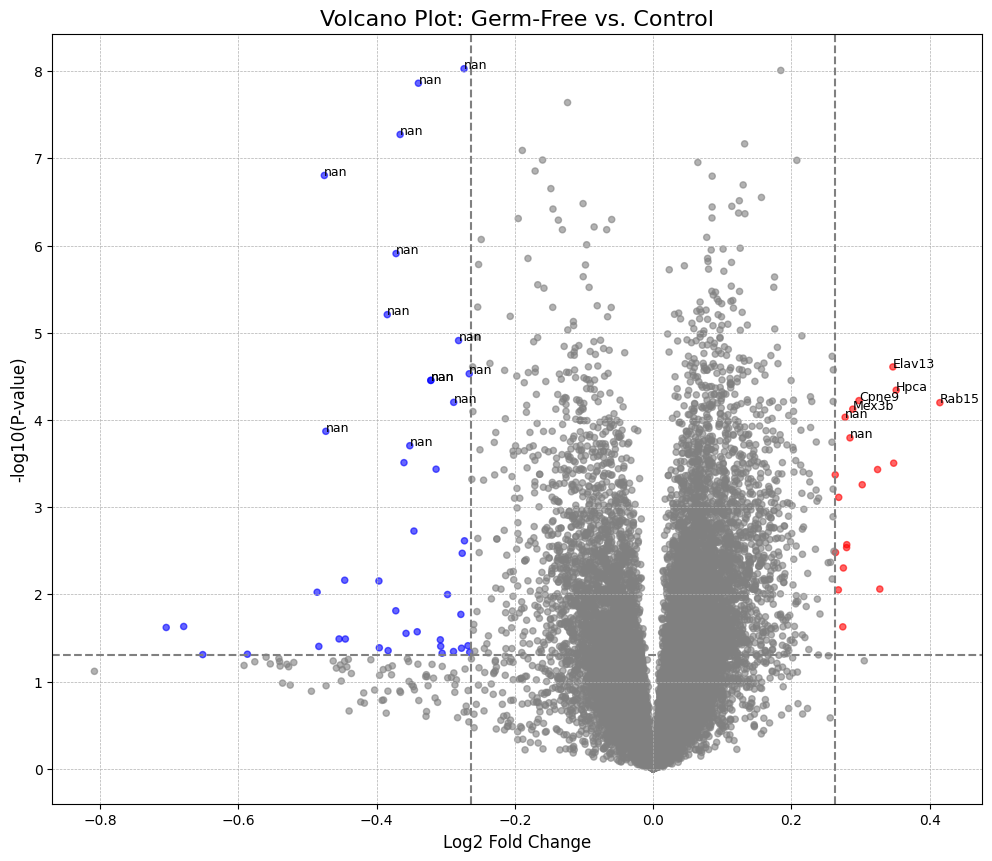

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# --- Part 1: Full Data Preparation ---

# This assumes 'analysis_df' is in your environment.
# (The cleaned, transposed gene expression data with a 'Condition' column)

# Define the groups to compare
group1_name = 'Control'
group2_name = 'Germ-Free'

group1_data = analysis_df[analysis_df['Condition'] == group1_name]
group2_data = analysis_df[analysis_df['Condition'] == group2_name]


# --- Part 2: Calculate Fold Change AND P-Value ---
results_list = []
for gene in analysis_df.drop(columns=['Condition']).columns:
    stat, p_value = ttest_ind(group1_data[gene], group2_data[gene], equal_var=False, nan_policy='omit')
    mean_group1 = group1_data[gene].mean()
    mean_group2 = group2_data[gene].mean()
    fold_change = (mean_group2 + 1e-6) / (mean_group1 + 1e-6)
    results_list.append({'Gene': gene, 'fold_change': fold_change, 'p_value': p_value})

results_df = pd.DataFrame(results_list)

# --- Part 3: Filter Out Control Probes ---
is_control_probe = (
    results_df['Gene'].str.contains('AFFX', na=False) |
    results_df['Gene'].str.contains('-neg-', na=False) |
    results_df['Gene'].str.contains('-pos-', na=False) |
    results_df['Gene'].str.contains('ERCC', na=False) |
    results_df['Gene'].str.contains('TSUnmapped', na=False)
)
cleaned_results_df = results_df[~is_control_probe].copy()


# --- Part 4: Add Official Gene Symbols ---

# The dictionary mapping probe IDs to gene symbols you created
id_to_gene_map = {
    'TC1200001956.mm.2': 'Rab15', 'TC0400003584.mm.2' : 'Hpca', 'TC0600000577.mm.2' : 'Gpnmb',
    'TC0900001892.mm.2': 'Elav13', 'TC1500001982.mm.2' : 'Sult4A1', 'TC1000001593.mm.2': 'Timeless',
    'TC1400002297.mm.2' : 'Nefm', 'TC0300002111.mm.2' : 'Shox2', 'TC0600001244.mm.2' : 'Cpne9',
    'TC0700001192.mm.2' : 'Mex3b', 'TC0600000878.mm.2' : 'Reg1', 'TC0800000919.mm.2' : 'Ucp1',
    'TC1100003919.mm.2' : 'Gh', 'TC0100000806.mm.2' : 'Akp3', 'TC1600000479.mm.2' : 'Muc13',
    'TC0400002770.mm.2' : 'Mup19', 'TC0400004210.mm.2' : 'Mup8', 'TC0400002769.mm.2' : 'Mup13',
    'TC0400004212.mm.2' : 'Mup12', 'TC0400004213.mm.2' : 'Gm2083', 'TC1800000956.mm.2' :'MPP7',
    'TC0Y00000223.mm.2' : 'ERDR1' , 'TC0800000297.mm.2'	:'SFRP1', 'TC0200003300.mm.2' :	'DNM1'
}
cleaned_results_df['Gene_Symbol'] = cleaned_results_df['Gene'].map(id_to_gene_map)


# --- Part 5: Create the Labeled Volcano Plot ---

# Calculate Log2FC and -log10(p-value)
cleaned_results_df['log2_fold_change'] = np.log2(cleaned_results_df['fold_change'])
cleaned_results_df['-log10_p_value'] = -np.log10(cleaned_results_df['p_value'])

# Set significance thresholds
p_value_threshold = 0.05
fold_change_threshold = 1.2

# Color the points
cleaned_results_df['color'] = 'grey'
up_sig = (cleaned_results_df['fold_change'] > fold_change_threshold) & (cleaned_results_df['p_value'] < p_value_threshold)
down_sig = (cleaned_results_df['fold_change'] < 1/fold_change_threshold) & (cleaned_results_df['p_value'] < p_value_threshold)
cleaned_results_df.loc[up_sig, 'color'] = 'red'
cleaned_results_df.loc[down_sig, 'color'] = 'blue'

# Create the plot
plt.figure(figsize=(12, 10))
plt.scatter(cleaned_results_df['log2_fold_change'], cleaned_results_df['-log10_p_value'], c=cleaned_results_df['color'], alpha=0.6, s=20)
plt.axvline(x=np.log2(fold_change_threshold), color='grey', linestyle='--')
plt.axvline(x=-np.log2(fold_change_threshold), color='grey', linestyle='--')
plt.axhline(y=-np.log10(p_value_threshold), color='grey', linestyle='--')

# --- NEW: Add Labels to Significant Genes ---
# Create a new DataFrame with only the significant genes for labeling
significant_genes = cleaned_results_df[(cleaned_results_df['color'] != 'grey')].copy()

# Sort by significance to label the most important ones first
significant_genes['rank'] = abs(significant_genes['log2_fold_change']) + significant_genes['-log10_p_value']
significant_genes = significant_genes.sort_values(by='rank', ascending=False)

# Loop through the top 20 significant genes and add their names to the plot
for i, row in significant_genes.head(20).iterrows():
    plt.text(row['log2_fold_change'], row['-log10_p_value'], row['Gene_Symbol'], fontsize=9)

# Add labels and title
plt.title(f'Volcano Plot: {group2_name} vs. {group1_name}', fontsize=16)
plt.xlabel('Log2 Fold Change', fontsize=12)
plt.ylabel('-log10(P-value)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

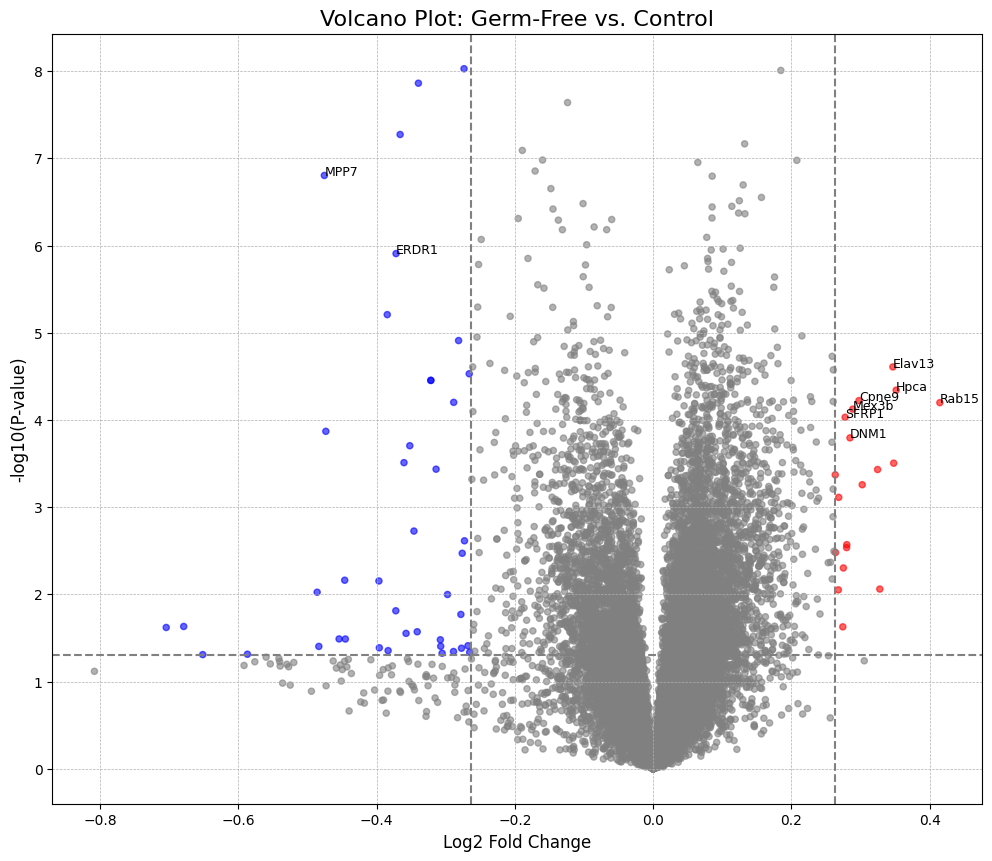

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# --- Part 1: Full Data Preparation ---
# This assumes 'analysis_df' is in your environment.
group1_name = 'Control'
group2_name = 'Germ-Free'
group1_data = analysis_df[analysis_df['Condition'] == group1_name]
group2_data = analysis_df[analysis_df['Condition'] == group2_name]

# --- Part 2: Calculate Fold Change AND P-Value ---
results_list = []
for gene_id in analysis_df.drop(columns=['Condition']).columns:
    stat, p_value = ttest_ind(group1_data[gene_id], group2_data[gene_id], equal_var=False, nan_policy='omit')
    mean_group1 = group1_data[gene_id].mean()
    mean_group2 = group2_data[gene_id].mean()
    fold_change = (mean_group2 + 1e-6) / (mean_group1 + 1e-6)
    results_list.append({'Gene': gene_id, 'fold_change': fold_change, 'p_value': p_value})
results_df = pd.DataFrame(results_list)

# --- Part 3: Filter and Add Gene Symbols ---
is_control_probe = (
    results_df['Gene'].str.contains('AFFX', na=False) |
    results_df['Gene'].str.contains('-neg-', na=False) |
    results_df['Gene'].str.contains('-pos-', na=False) |
    results_df['Gene'].str.contains('ERCC', na=False) |
    results_df['Gene'].str.contains('TSUnmapped', na=False)
)
cleaned_results_df = results_df[~is_control_probe].copy()

# Your dictionary mapping probe IDs to gene symbols
id_to_gene_map = {
    'TC1200001956.mm.2': 'Rab15', 'TC0400003584.mm.2' : 'Hpca', 
    'TC0900001892.mm.2': 'Elav13', 
    'TC0600001244.mm.2' : 'Cpne9',
    'TC0700001192.mm.2' : 'Mex3b',  'TC1800000956.mm.2' :'MPP7',
    'TC0Y00000223.mm.2' : 'ERDR1' , 'TC0800000297.mm.2'	:'SFRP1', 'TC0200003300.mm.2' :	'DNM1'
    
}
cleaned_results_df['Gene_Symbol'] = cleaned_results_df['Gene'].map(id_to_gene_map)

# --- Part 4: Create the Labeled Volcano Plot ---

# Calculate Log2FC and -log10(p-value)
cleaned_results_df['log2_fold_change'] = np.log2(cleaned_results_df['fold_change'])
cleaned_results_df['-log10_p_value'] = -np.log10(cleaned_results_df['p_value'])

# Set significance thresholds and color points
p_value_threshold = 0.05
fold_change_threshold = 1.2
cleaned_results_df['color'] = 'grey'
up_sig = (cleaned_results_df['fold_change'] > fold_change_threshold) & (cleaned_results_df['p_value'] < p_value_threshold)
down_sig = (cleaned_results_df['fold_change'] < 1/fold_change_threshold) & (cleaned_results_df['p_value'] < p_value_threshold)
cleaned_results_df.loc[up_sig, 'color'] = 'red'
cleaned_results_df.loc[down_sig, 'color'] = 'blue'

# Create the plot
plt.figure(figsize=(12, 10))
plt.scatter(cleaned_results_df['log2_fold_change'], cleaned_results_df['-log10_p_value'], c=cleaned_results_df['color'], alpha=0.6, s=20)
plt.axvline(x=np.log2(fold_change_threshold), color='grey', linestyle='--')
plt.axvline(x=-np.log2(fold_change_threshold), color='grey', linestyle='--')
plt.axhline(y=-np.log10(p_value_threshold), color='grey', linestyle='--')

# --- NEW: Add Labels to ANNOTATED Significant Genes ---
significant_genes = cleaned_results_df[cleaned_results_df['color'] != 'grey'].copy()

# *** THIS IS THE KEY CHANGE ***
# From the significant genes, select only the ones that you have successfully named
genes_to_label = significant_genes.dropna(subset=['Gene_Symbol'])

# Loop through only the named genes and add their symbols to the plot
for i, row in genes_to_label.iterrows():
    plt.text(row['log2_fold_change'], row['-log10_p_value'], row['Gene_Symbol'], fontsize=9)

# Add labels and title
plt.title(f'Volcano Plot: {group2_name} vs. {group1_name}', fontsize=16)
plt.xlabel('Log2 Fold Change', fontsize=12)
plt.ylabel('-log10(P-value)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
labeled_genes_table = genes_to_label.sort_values(by='p_value', ascending=True)

# Select and reorder the columns for a clean presentation
final_table = labeled_genes_table[['Gene_Symbol', 'log2_fold_change', 'p_value']]

print("\n--- Summary Table of Genes Labeled on Volcano Plot (Sorted by P-Value) ---")
print(final_table)


--- Summary Table of Genes Labeled on Volcano Plot (Sorted by P-Value) ---
      Gene_Symbol  log2_fold_change       p_value
27789        MPP7         -0.475760  1.573044e-07
19798       ERDR1         -0.372027  1.237822e-06
18203      Elav13          0.346897  2.467316e-05
11709        Hpca          0.351678  4.559283e-05
13631       Cpne9          0.297789  6.006414e-05
23070       Rab15          0.414882  6.341794e-05
14937       Mex3b          0.288819  7.524373e-05
16558       SFRP1          0.277774  9.327079e-05
8837         DNM1          0.284790  1.606373e-04


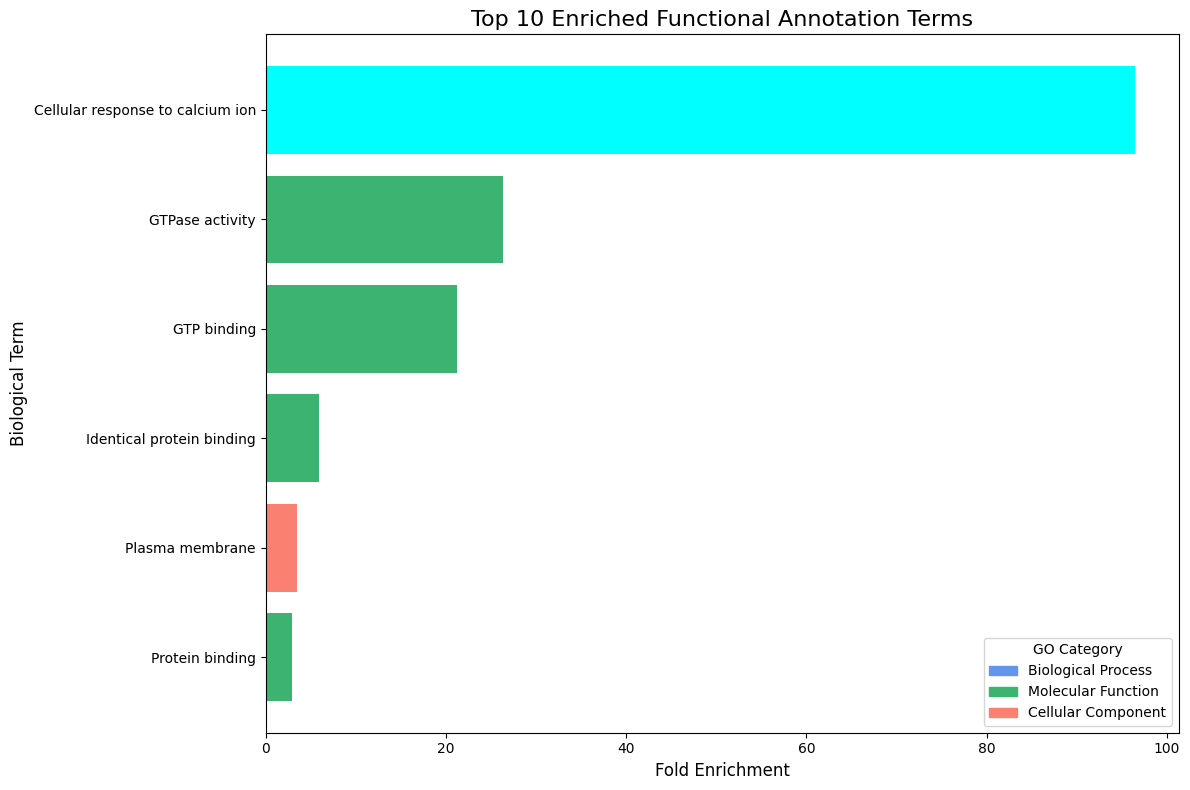

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Part 1: Load and Prepare the Data ---

# Load the comma-separated file
filename = "david_profile.csv"
df = pd.read_csv(filename, sep=',')

# Clean up the 'Term' column to make it more readable
df['Term'] = df['Term'].apply(lambda x: x.split('~')[-1])

# --- Part 2: Select and Sort the Top Terms ---

# Sort by 'Fold Enrichment' to find the most enriched terms
top_10_terms = df.sort_values(by='Fold Enrichment', ascending=False).head(10)

# For plotting, re-sort so the highest bar appears at the top of the chart
df_sorted = top_10_terms.sort_values(by='Fold Enrichment', ascending=True)

# --- Part 3: Create the Color-Coded Bar Chart ---

# Create a color map for each GO category
# This assumes your 'Category' column has these exact names
color_map = {
    'GOTERM_BP_DIRECT': 'cyan', # Biological Process
    'GOTERM_MF_DIRECT': 'mediumseagreen',   # Molecular Function
    'GOTERM_CC_DIRECT': 'salmon'      # Cellular Component
}
# Map the colors to our top terms
bar_colors = df_sorted['Category'].map(color_map)


plt.figure(figsize=(12, 8))

# Create a horizontal bar plot with the specified colors
plt.barh(
    df_sorted['Term'],
    df_sorted['Fold Enrichment'],
    color=bar_colors
)

# --- Part 4: Add Labels, Legend, and Final Touches ---

# Add labels and a title
plt.xlabel('Fold Enrichment', fontsize=12)
plt.ylabel('Biological Term', fontsize=12)
plt.title('Top 10 Enriched Functional Annotation Terms', fontsize=16)

# Create a custom legend for the colors
legend_labels = {
    'Biological Process': 'cornflowerblue',
    'Molecular Function': 'mediumseagreen',
    'Cellular Component': 'salmon'
}
legend_patches = [plt.Rectangle((0,0),1,1, color=color) for color in legend_labels.values()]
plt.legend(legend_patches, legend_labels.keys(), title="GO Category", fontsize=10)

plt.tight_layout()
plt.show()

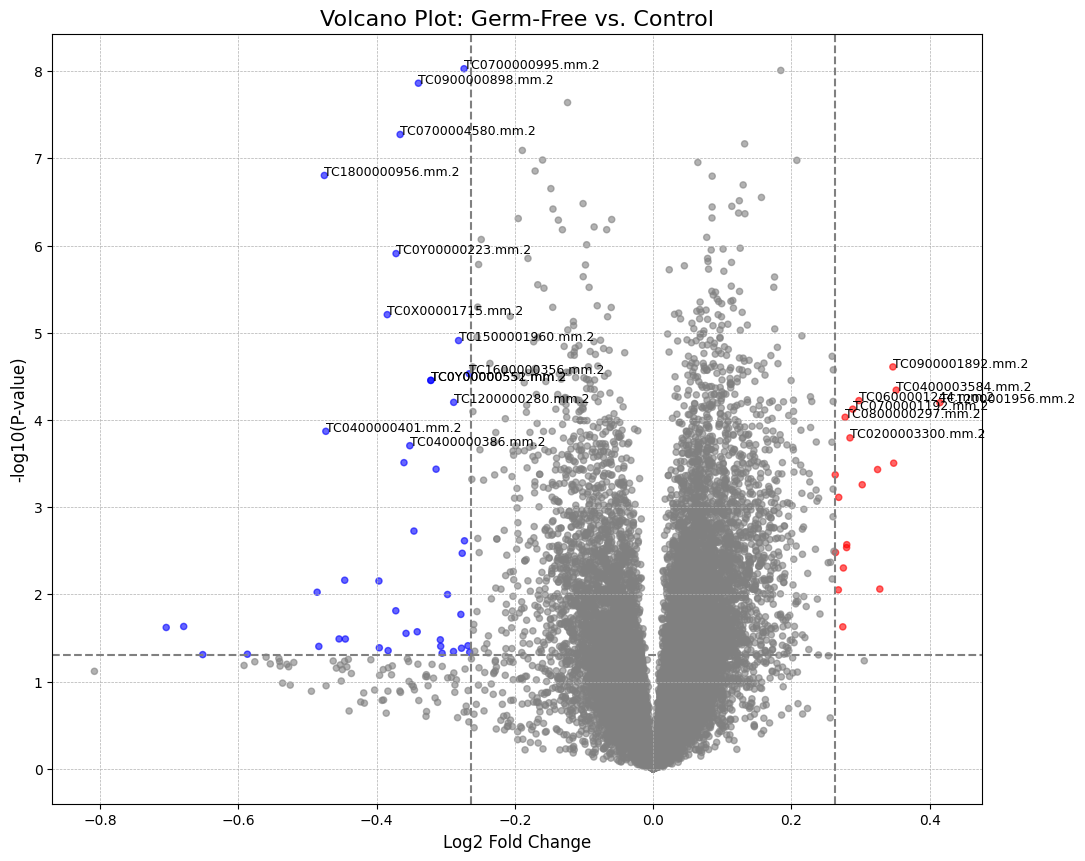

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# --- Part 1: Full Data Preparation ---
# This assumes 'analysis_df' is in your environment.
group1_name = 'Control'
group2_name = 'Germ-Free'
group1_data = analysis_df[analysis_df['Condition'] == group1_name]
group2_data = analysis_df[analysis_df['Condition'] == group2_name]

# --- Part 2: Calculate Fold Change AND P-Value ---
results_list = []
for gene_id in analysis_df.drop(columns=['Condition']).columns:
    stat, p_value = ttest_ind(group1_data[gene_id], group2_data[gene_id], equal_var=False, nan_policy='omit')
    mean_group1 = group1_data[gene_id].mean()
    mean_group2 = group2_data[gene_id].mean()
    fold_change = (mean_group2 + 1e-6) / (mean_group1 + 1e-6)
    results_list.append({'Gene': gene_id, 'fold_change': fold_change, 'p_value': p_value})
results_df = pd.DataFrame(results_list)

# --- Part 3: Filter Out Control Probes ---
is_control_probe = (
    results_df['Gene'].str.contains('AFFX', na=False) |
    results_df['Gene'].str.contains('-neg-', na=False) |
    results_df['Gene'].str.contains('-pos-', na=False) |
    results_df['Gene'].str.contains('ERCC', na=False) |
    results_df['Gene'].str.contains('TSUnmapped', na=False)
)
cleaned_results_df = results_df[~is_control_probe].copy()

# --- Part 4: Create the Labeled Volcano Plot ---

# Calculate Log2FC and -log10(p-value)
cleaned_results_df['log2_fold_change'] = np.log2(cleaned_results_df['fold_change'])
cleaned_results_df['-log10_p_value'] = -np.log10(cleaned_results_df['p_value'])

# Set significance thresholds and color points
p_value_threshold = 0.05
fold_change_threshold = 1.2
cleaned_results_df['color'] = 'grey'
up_sig = (cleaned_results_df['fold_change'] > fold_change_threshold) & (cleaned_results_df['p_value'] < p_value_threshold)
down_sig = (cleaned_results_df['fold_change'] < 1/fold_change_threshold) & (cleaned_results_df['p_value'] < p_value_threshold)
cleaned_results_df.loc[up_sig, 'color'] = 'red'
cleaned_results_df.loc[down_sig, 'color'] = 'blue'

# Create the plot
plt.figure(figsize=(12, 10))
plt.scatter(cleaned_results_df['log2_fold_change'], cleaned_results_df['-log10_p_value'], c=cleaned_results_df['color'], alpha=0.6, s=20)
plt.axvline(x=np.log2(fold_change_threshold), color='grey', linestyle='--')
plt.axvline(x=-np.log2(fold_change_threshold), color='grey', linestyle='--')
plt.axhline(y=-np.log10(p_value_threshold), color='grey', linestyle='--')

# --- Add Labels using the Transcript ID ---
significant_genes = cleaned_results_df[cleaned_results_df['color'] != 'grey'].copy()
significant_genes['rank'] = abs(significant_genes['log2_fold_change']) + significant_genes['-log10_p_value']
significant_genes = significant_genes.sort_values(by='rank', ascending=False)

# Loop through the top 20 genes and add their Transcript ID from the 'Gene' column
for i, row in significant_genes.head(20).iterrows():
    # *** THIS IS THE ONLY LINE THAT HAS CHANGED ***
    plt.text(row['log2_fold_change'], row['-log10_p_value'], row['Gene'], fontsize=9)

# Add labels and title
plt.title(f'Volcano Plot: {group2_name} vs. {group1_name}', fontsize=16)
plt.xlabel('Log2 Fold Change', fontsize=12)
plt.ylabel('-log10(P-value)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
import pandas as pd

# Use the correct filename
filename = "GSE241110_series_matrix.txt"

# Load the data, using '!' as a comment character to skip metadata
# This forces pandas to read the first non-comment line as the header
gene_df = pd.read_csv(filename, sep='\t', comment='!', index_col=0)

# Print the exact column names from your file
print("--- Actual Sample Names in Your File ---")
print(gene_df.columns.tolist())

--- Actual Sample Names in Your File ---
['GSM7716912', 'GSM7716913', 'GSM7716914', 'GSM7716915', 'GSM7716916', 'GSM7716917', 'GSM7716918', 'GSM7716919', 'GSM7716920', 'GSM7716921', 'GSM7716922', 'GSM7716923', 'GSM7716924', 'GSM7716925', 'GSM7716926', 'GSM7716927', 'GSM7716928']


In [91]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# --- Part 1: Combine Individual Files into One Master Table ---
# This part is correct and remains unchanged.

file_names = [
    'GSM8028440_Ctrl-1.gene_abund.tab', 'GSM8028441_Ctrl-2.gene_abund.tab', 'GSM8028442_Ctrl-3.gene_abund.tab',
    'GSM8028443_CRS-1+2.gene_abund.tab', 'GSM8028444_CRS-3.gene_abund.tab', 'GSM8028445_CRS-4+5+6.gene_abund.tab',
    'GSM8028446_Vehicle-3.gene_abund.tab', 'GSM8028447_Vehicle-5.gene_abund.tab', 'GSM8028448_Vehicle-6.gene_abund.tab',
    'GSM8028449_CORT-2.gene_abund.tab', 'GSM8028450_CORT-4.gene_abund.tab', 'GSM8028451_CORT-5.gene_abund.tab'
]

# --- Part 1: Combine Individual Files into One Master Table ---

all_samples_data = []

# Loop through each file
for file in file_names:
    # Read the file
    sample_df = pd.read_csv(file, sep='\t')
    
    # We only need the gene names and their expression value (TPM)
    sample_data = sample_df[['Gene Name', 'TPM']]

    # --- THE FIX IS HERE ---
    # If there are duplicate gene names, group them and take their mean TPM value.
    # This ensures every gene name is unique before it becomes an index.
    sample_data = sample_data.groupby('Gene Name').mean().reset_index()
    # --- END FIX ---
    
    # Get the sample name from the file name (e.g., "Ctrl-1")
    sample_name = file.split('_')[1].split('.')[0]
    
    # Rename the 'TPM' column to the sample name
    sample_data = sample_data.rename(columns={'TPM': sample_name})
    
    # Set the 'Gene Name' as the index for merging
    sample_data = sample_data.set_index('Gene Name')
    
    all_samples_data.append(sample_data)

# This will now work without error
master_df = pd.concat(all_samples_data, axis=1)

# You can now proceed with the rest of your script
print("Successfully created master DataFrame.")
print(master_df.head())

# --- Part 2: Clean and Prepare the Data ---
# MODIFIED: Replaced the simple mean filter with a more robust one.

# Define the sample columns for each condition
ctrl_samples = ['Ctrl-1', 'Ctrl-2', 'Ctrl-3']
crs_samples = ['CRS-1+2', 'CRS-3', 'CRS-4+5+6']
vehicle_samples = ['Vehicle-3', 'Vehicle-5', 'Vehicle-6']
cort_samples = ['CORT-2', 'CORT-4', 'CORT-5']

# Filter 1: Keep genes expressed > 1 TPM in at least 2/3 samples in ANY group
# This ensures we only analyze genes that are reliably detected.
is_expressed_in_ctrl = (master_df[ctrl_samples] > 1).sum(axis=1) >= 2
is_expressed_in_crs = (master_df[crs_samples] > 1).sum(axis=1) >= 2
is_expressed_in_vehicle = (master_df[vehicle_samples] > 1).sum(axis=1) >= 2
is_expressed_in_cort = (master_df[cort_samples] > 1).sum(axis=1) >= 2

genes_to_keep = master_df[is_expressed_in_ctrl | is_expressed_in_crs | is_expressed_in_vehicle | is_expressed_in_cort]

cleaned_df = genes_to_keep.copy() # Use .copy() to ensure it's a new DataFrame

print(f"Original number of genes: {len(master_df)}")
print(f"Number of genes after robust cleaning: {len(cleaned_df)}\n")

# Transpose the data and add a 'Condition' column
master_df_T = cleaned_df.T
master_df_T['Condition'] = [idx.split('-')[0] for idx in master_df_T.index]

# The rest of your code (Part 3, 4, 5) can now run on this properly cleaned data.

# --- Part 3: Perform Statistical Comparisons ---
# MODIFIED: Added a larger offset to stabilize fold change calculations.

# Define the sample groups from the cleaned, transposed DataFrame
control_group = master_df_T[master_df_T['Condition'] == 'Ctrl']
stress_group_crs = master_df_T[master_df_T['Condition'] == 'CRS']
vehicle_group = master_df_T[master_df_T['Condition'] == 'Vehicle']
stress_group_cort = master_df_T[master_df_T['Condition'] == 'CORT']

# Define an offset to add to the mean expression values
# This prevents division by near-zero numbers and stabilizes fold change.
offset = 0.1

# --- Comparison 1: CRS vs. Control ---
results_crs_list = []
for gene in cleaned_df.index:
    # T-test is performed on the original data
    stat, p_value = ttest_ind(stress_group_crs[gene], control_group[gene], equal_var=False, nan_policy='omit')
    
    # Fold change is calculated using the offset
    mean_stress = stress_group_crs[gene].mean()
    mean_control = control_group[gene].mean()
    fold_change = (mean_stress + offset) / (mean_control + offset)
    
    results_crs_list.append({'Gene': gene, 'fold_change': fold_change, 'p_value': p_value})
results_crs_df = pd.DataFrame(results_crs_list)

# --- Comparison 2: CORT vs. Vehicle ---
results_cort_list = []
for gene in cleaned_df.index:
    # T-test is performed on the original data
    stat, p_value = ttest_ind(stress_group_cort[gene], vehicle_group[gene], equal_var=False, nan_policy='omit')
    
    # Fold change is calculated using the offset
    mean_stress = stress_group_cort[gene].mean()
    mean_control = vehicle_group[gene].mean()
    fold_change = (mean_stress + offset) / (mean_control + offset)
    
    results_cort_list.append({'Gene': gene, 'fold_change': fold_change, 'p_value': p_value})
results_cort_df = pd.DataFrame(results_cort_list)

# The rest of your code (Part 4 and 5) will now work with realistic values.


# --- Part 4: Display the Final Results ---
# MODIFIED: Display results for both comparisons clearly.

print("="*50)
print("      Comparison 1: CRS Stress vs. Control")
print("="*50)
print("\n--- Top 10 UPREGULATED Genes in CRS group ---")
print(results_crs_df.sort_values(by='fold_change', ascending=False).head(10))
print("\n--- Top 10 DOWNREGULATED Genes in CRS group ---")
print(results_crs_df.sort_values(by='fold_change', ascending=True).head(10))

print("\n\n" + "="*50)
print("      Comparison 2: CORT Stress vs. Vehicle")
print("="*50)
print("\n--- Top 10 UPREGULATED Genes in CORT group ---")
print(results_cort_df.sort_values(by='fold_change', ascending=False).head(10))
print("\n--- Top 10 DOWNREGULATED Genes in CORT group ---")
print(results_cort_df.sort_values(by='fold_change', ascending=True).head(10))

Successfully created master DataFrame.
                  Ctrl-1     Ctrl-2     Ctrl-3    CRS-1+2      CRS-3  \
Gene Name                                                              
0610007P14Rik  91.122757  94.306000  77.236794  73.368576  86.105034   
0610009B22Rik  50.477741  54.625835  60.190144  42.339802  46.092918   
0610009E02Rik   0.000000   0.036540   0.442389   1.732321   0.806430   
0610009L18Rik  11.146801  17.498074  16.704514  13.308807   5.598955   
0610009O20Rik  58.106968  53.537457  58.760582  58.606289  62.244049   

               CRS-4+5+6  Vehicle-3  Vehicle-5  Vehicle-6     CORT-2  \
Gene Name                                                              
0610007P14Rik  75.578690  75.970230  70.170143  76.445946  80.454849   
0610009B22Rik  53.952747  49.378647  49.594872  57.370911  57.572472   
0610009E02Rik   2.660469   1.030362   2.056368   2.771908   0.639989   
0610009L18Rik  15.619060  12.640261   9.645256  12.129935  11.701710   
0610009O20Rik  64.095474

In [92]:
# --- Part 6: Filter for Significant Genes ---

# We'll work with the CRS vs Control results DataFrame
results_df = results_crs_df.copy()

# 1. Calculate Log2 Fold Change for symmetrical filtering
results_df['log2_fold_change'] = np.log2(results_df['fold_change'])

# 2. Define the thresholds
p_value_threshold = 0.05
log2fc_threshold = 1.0 # This corresponds to a 2-fold change

# 3. Apply the filters to find significant genes
significant_genes_df = results_df[
    (results_df['p_value'] < p_value_threshold) &
    (abs(results_df['log2_fold_change']) > log2fc_threshold)
]

print("="*60)
print("   Final List of Significantly Differentiated Genes (CRS vs. Control)")
print("="*60)

# Sort the final list to see the most changed genes at the top
significant_genes_df = significant_genes_df.sort_values(by='log2_fold_change', ascending=False)

print(f"Found {len(significant_genes_df)} significant genes meeting the criteria.")
print(significant_genes_df)

   Final List of Significantly Differentiated Genes (CRS vs. Control)
Found 155 significant genes meeting the criteria.
                Gene  fold_change   p_value  log2_fold_change
13352         Zbtb16    50.248986  0.002854          5.651023
2798          Cyp1a1    25.558237  0.039169          4.675716
5412          Gm4035    16.852793  0.023050          4.074916
4730         Gm14393    16.369287  0.026627          4.032920
973          Angptl4    16.247349  0.012035          4.022132
...              ...          ...       ...               ...
7234   M5C1000I18Rik     0.152747  0.010558         -2.710785
2906             Dbp     0.125843  0.013350         -2.990301
4862         Gm16053     0.073206  0.003040         -3.771887
10376     Rpl31-ps13     0.067259  0.045533         -3.894134
4999         Gm20521     0.057649  0.011894         -4.116572

[155 rows x 4 columns]


In [93]:
# Save the full DataFrame of 155 genes to a CSV file
significant_genes_df.to_csv('significant_CRS_vs_Control_genes.csv')

print("Successfully saved 155 significant genes to 'significant_CRS_vs_Control_genes.csv'")

Successfully saved 155 significant genes to 'significant_CRS_vs_Control_genes.csv'


In [101]:
# Assume 'significant_genes_df' is your DataFrame with 155 significant genes.
# Make sure the gene symbols are in a column named 'Gene'
if 'Gene' not in significant_genes_df.columns:
    significant_genes_df.reset_index(inplace=True)

print(f"Starting with {len(significant_genes_df)} significant genes...")

# --- Updated Filtering Logic ---
# We've added two new lines to catch pseudogenes (-ps) and ribosomal proteins (Rp)

cleaned_genes_df = significant_genes_df[
    ~significant_genes_df['Gene'].str.startswith('Gm') &      # Removes predicted genes
    ~significant_genes_df['Gene'].str.contains('Mir') &       # Removes microRNAs
    ~significant_genes_df['Gene'].str.endswith('Rik') &       # Removes RIKEN genes
    ~significant_genes_df['Gene'].str.contains('-ps', case=False) & # Removes pseudogenes
    ~significant_genes_df['Gene'].str.startswith(('Rps', 'Rpl'))   # Removes ribosomal proteins
].copy()


print("\n" + "="*50)
print("     Final, More Thoroughly Cleaned List of Genes")
print("="*50)
print(f"Found {len(cleaned_genes_df)} genes after more aggressive cleaning.")
print(cleaned_genes_df.head()) # Display the top of the final list

Starting with 155 significant genes...

     Final, More Thoroughly Cleaned List of Genes
Found 101 genes after more aggressive cleaning.
      Gene  fold_change   p_value  log2_fold_change  -log10_p_value
0   Zbtb16    50.248986  0.002854          5.651023        2.544499
1   Cyp1a1    25.558237  0.039169          4.675716        1.407060
4  Angptl4    16.247349  0.012035          4.022132        1.919546
5    Adrb2    14.072852  0.048137          3.814843        1.317521
7     Sgk1    12.402204  0.025061          3.632525        1.601005


Successfully created master DataFrame.
Performed CRS vs. Control statistical analysis.
Found 245 significant genes.
Found 154 genes after name-based cleaning.

--- List of Top 10 Cleaned Genes Being Plotted ---
['Zbtb16', 'Cyp1a1', 'Angptl4', 'Adrb2', 'Sgk1', 'Zscan10', 'Hoxb5', 'Tef', 'Cga', 'Dbp']
---------------------------------------------


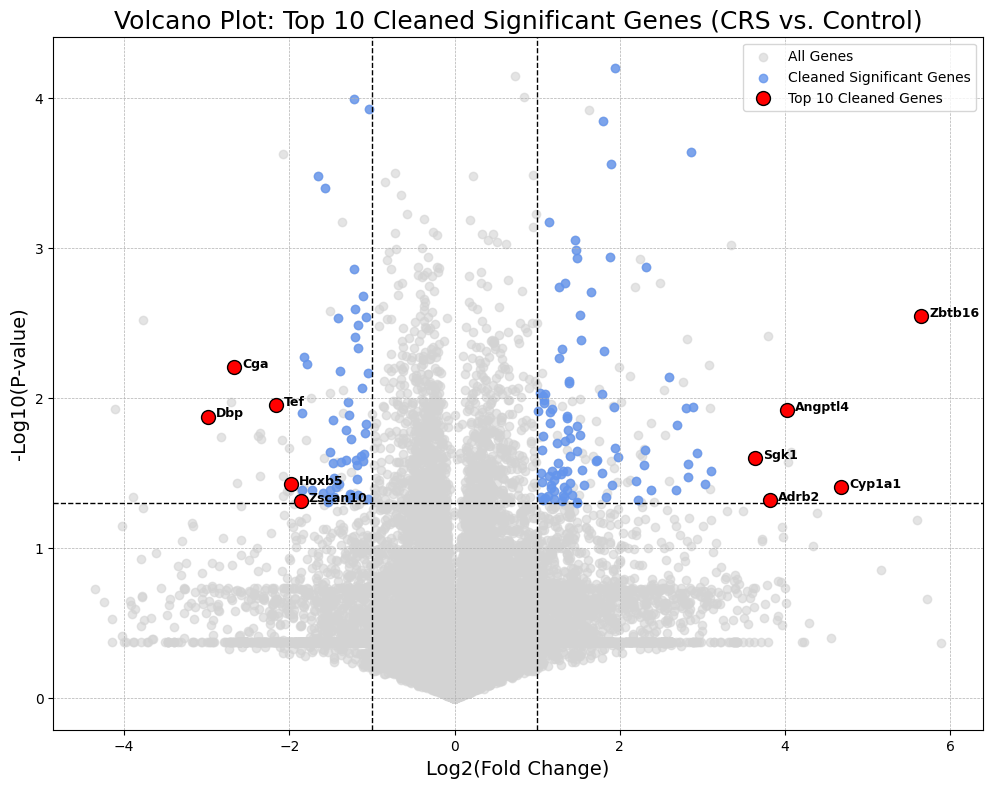

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# --- Part 1: Load and Combine All Raw Data ---

file_names = [
    'GSM8028440_Ctrl-1.gene_abund.tab', 'GSM8028441_Ctrl-2.gene_abund.tab', 'GSM8028442_Ctrl-3.gene_abund.tab',
    'GSM8028443_CRS-1+2.gene_abund.tab', 'GSM8028444_CRS-3.gene_abund.tab', 'GSM8028445_CRS-4+5+6.gene_abund.tab',
    'GSM8028446_Vehicle-3.gene_abund.tab', 'GSM8028447_Vehicle-5.gene_abund.tab', 'GSM8028448_Vehicle-6.gene_abund.tab',
    'GSM8028449_CORT-2.gene_abund.tab', 'GSM8028450_CORT-4.gene_abund.tab', 'GSM8028451_CORT-5.gene_abund.tab'
]
all_samples_data = []
for file in file_names:
    sample_df = pd.read_csv(file, sep='\t')
    sample_data = sample_df[['Gene Name', 'TPM']].groupby('Gene Name').mean().reset_index()
    sample_name = file.split('_')[1].split('.')[0]
    sample_data = sample_data.rename(columns={'TPM': sample_name}).set_index('Gene Name')
    all_samples_data.append(sample_data)
master_df = pd.concat(all_samples_data, axis=1)
print("Successfully created master DataFrame.")

# --- Part 2: Perform CRS vs. Control Statistical Analysis ---

master_df_T = master_df.T
master_df_T['Condition'] = [idx.split('-')[0] for idx in master_df_T.index]
control_group = master_df_T[master_df_T['Condition'] == 'Ctrl']
stress_group_crs = master_df_T[master_df_T['Condition'] == 'CRS']

offset = 0.1
results_list = []
for gene in master_df.index:
    stat, p_value = ttest_ind(stress_group_crs[gene], control_group[gene], equal_var=False, nan_policy='omit')
    mean_stress = stress_group_crs[gene].mean()
    mean_control = control_group[gene].mean()
    fold_change = (mean_stress + offset) / (mean_control + offset)
    results_list.append({'Gene': gene, 'fold_change': fold_change, 'p_value': p_value})
results_crs_df = pd.DataFrame(results_list)
print("Performed CRS vs. Control statistical analysis.")

# --- Part 3: Filter for Significant Genes ---

results_crs_df['log2_fold_change'] = np.log2(results_crs_df['fold_change'])
significant_genes_df = results_crs_df[
    (results_crs_df['p_value'] < 0.05) &
    (abs(results_crs_df['log2_fold_change']) > 1.0)
].copy()
print(f"Found {len(significant_genes_df)} significant genes.")

# --- Part 4: Clean Significant Genes by Name ---

cleaned_genes_df = significant_genes_df[
    ~significant_genes_df['Gene'].str.startswith('Gm') &
    ~significant_genes_df['Gene'].str.contains('Mir') &
    ~significant_genes_df['Gene'].str.endswith('Rik') &
    ~significant_genes_df['Gene'].str.contains('-ps', case=False) &
    ~significant_genes_df['Gene'].str.startswith(('Rps', 'Rpl'))
].copy()
print(f"Found {len(cleaned_genes_df)} genes after name-based cleaning.")

# --- Part 5: Identify and List the Top 10 Cleaned Genes ---

cleaned_genes_df = cleaned_genes_df.sort_values(by='log2_fold_change', ascending=False)
top_upregulated = cleaned_genes_df.head(5)
top_downregulated = cleaned_genes_df.tail(5)
top_10_genes = pd.concat([top_upregulated, top_downregulated])

top_10_gene_list = top_10_genes['Gene'].tolist()
print("\n--- List of Top 10 Cleaned Genes Being Plotted ---")
print(top_10_gene_list)
print("-" * 45)

# --- Part 6: Create the Final Volcano Plot ---

# Add the '-log10_p_value' column to ALL results for the background plot
results_crs_df['-log10_p_value'] = -np.log10(results_crs_df['p_value'])

plt.figure(figsize=(12, 9))

# Plot all genes for context
plt.scatter(
    results_crs_df['log2_fold_change'],
    results_crs_df['-log10_p_value'],
    color='lightgrey', alpha=0.6, label='All Genes'
)
# Plot all cleaned significant genes
plt.scatter(
    cleaned_genes_df['log2_fold_change'],
    -np.log10(cleaned_genes_df['p_value']), # Calculate on the fly
    color='cornflowerblue', alpha=0.8, label='Cleaned Significant Genes'
)
# Highlight the top 10
plt.scatter(
    top_10_genes['log2_fold_change'],
    -np.log10(top_10_genes['p_value']), # Calculate on the fly
    color='red', s=100, edgecolor='black', zorder=5, label='Top 10 Cleaned Genes'
)

# Add labels for the top 10 genes
for i, gene in top_10_genes.iterrows():
    plt.text(
        gene['log2_fold_change'] + 0.1,
        -np.log10(gene['p_value']),
        gene['Gene'],
        fontsize=9, fontweight='bold'
    )

# Add threshold lines and labels
plt.axhline(y=-np.log10(0.05), color='black', linestyle='--', lw=1)
plt.axvline(x=1.0, color='black', linestyle='--', lw=1)
plt.axvline(x=-1.0, color='black', linestyle='--', lw=1)
plt.title('Volcano Plot: Top 10 Cleaned Significant Genes (CRS vs. Control)', fontsize=18)
plt.xlabel('Log2(Fold Change)', fontsize=14)
plt.ylabel('-Log10(P-value)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)

plt.savefig("volcano_plot_top10_cleaned.png")
plt.show()

Successfully loaded and processed the data.


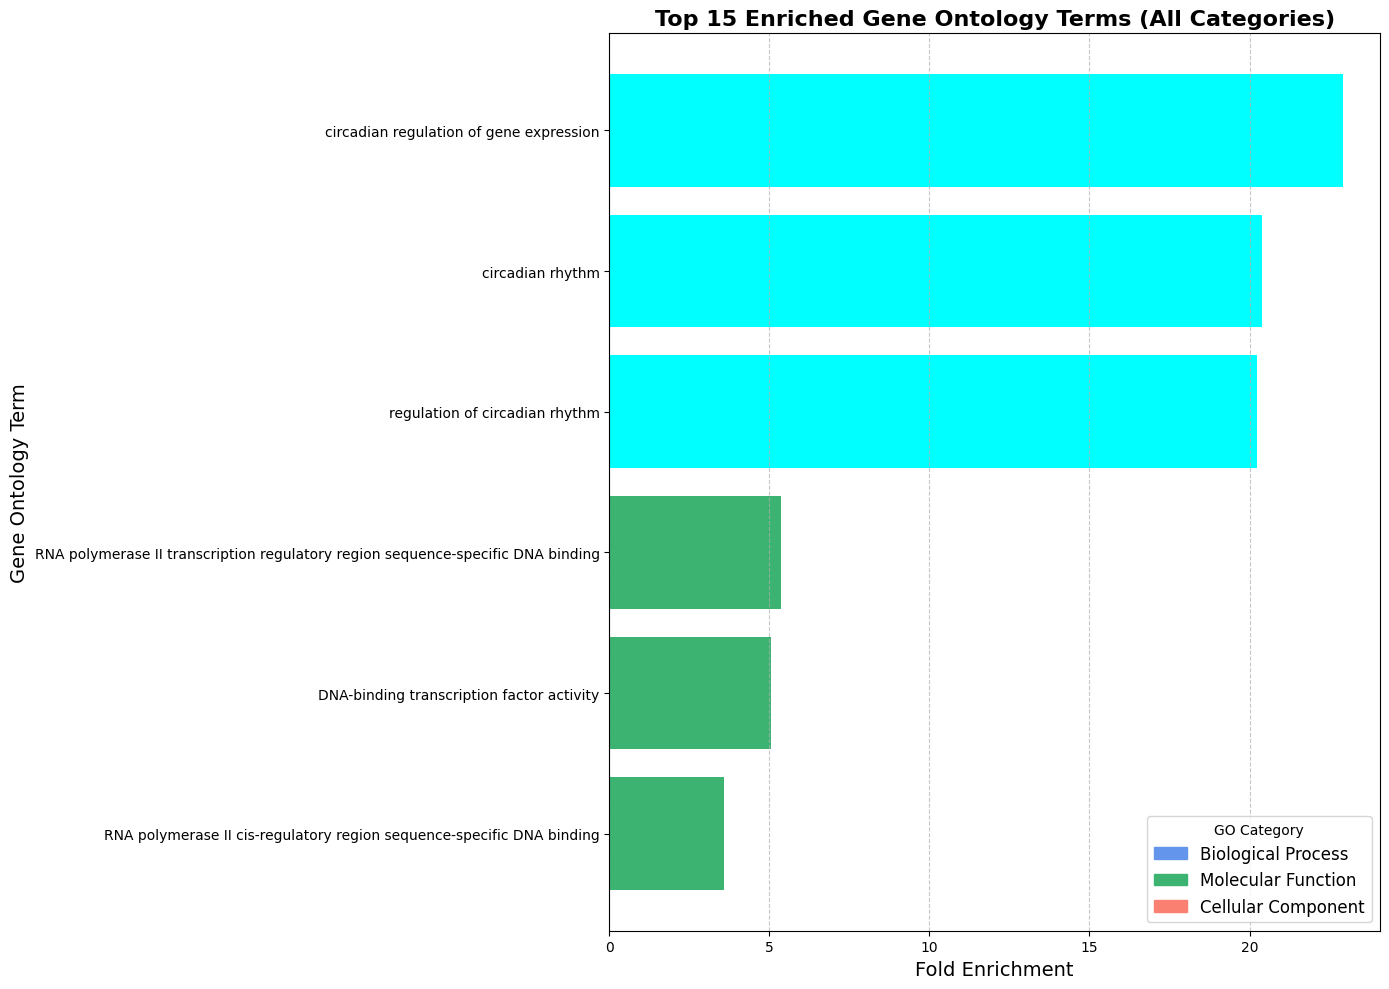

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Part 1: Load and Process Data Efficiently ---

try:
    # Load the data and perform all filtering/sorting in one go
    plot_data = (
        pd.read_csv('gene_ontology.csv')
        .query("Category in ['GOTERM_BP_DIRECT', 'GOTERM_MF_DIRECT', 'GOTERM_CC_DIRECT']")
        .query("Benjamini < 0.05")
        .nlargest(15, 'Fold Enrichment')
        .sort_values('Fold Enrichment', ascending=True)
    )
    print("Successfully loaded and processed the data.")
except FileNotFoundError:
    print("Error: 'Gene ontology.csv' not found. Please place it in the correct directory.")
    exit()

# --- Part 2: Create the Color-Coded Bar Plot ---

# Create a color map for each GO category
color_map = {
    'GOTERM_BP_DIRECT': 'cyan', # Biological Process
    'GOTERM_MF_DIRECT': 'mediumseagreen',   # Molecular Function
    'GOTERM_CC_DIRECT': 'salmon'      # Cellular Component
}

plt.figure(figsize=(14, 10))

# Create the plot directly from the processed data
plt.barh(
    plot_data['Term'],
    plot_data['Fold Enrichment'],
    color=plot_data['Category'].map(color_map)
)

# --- Part 3: Add Labels, Legend, and Final Touches ---

plt.xlabel('Fold Enrichment', fontsize=14)
plt.ylabel('Gene Ontology Term', fontsize=14)
plt.title('Top 15 Enriched Gene Ontology Terms (All Categories)', fontsize=16, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Create a custom legend
legend_labels = {'Biological Process': 'cornflowerblue', 'Molecular Function': 'mediumseagreen', 'Cellular Component': 'salmon'}
legend_patches = [plt.Rectangle((0,0),1,1, color=color) for color in legend_labels.values()]
plt.legend(legend_patches, legend_labels.keys(), title="GO Category", fontsize=12)

plt.tight_layout()
plt.savefig('gene_ontology_combined_barchart.png', dpi=300)
plt.show()

KEGG plot with p-values saved as 'kegg_pathway_plot_with_pvalues.png'


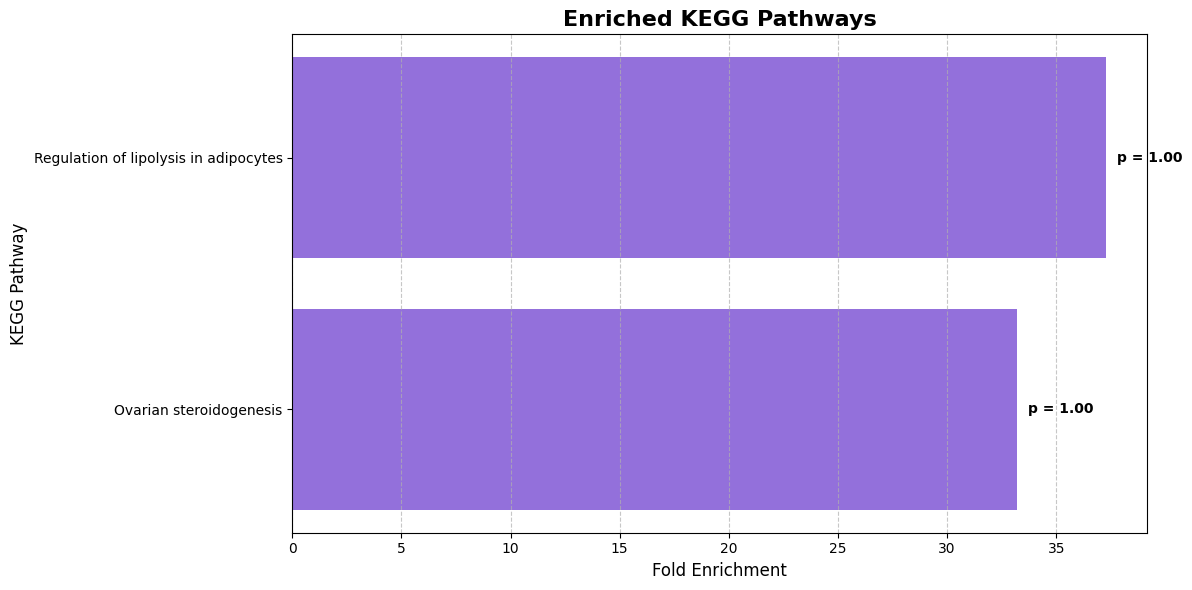

Reactome plot with p-values saved as 'reactome_pathway_plot_with_pvalues.png'


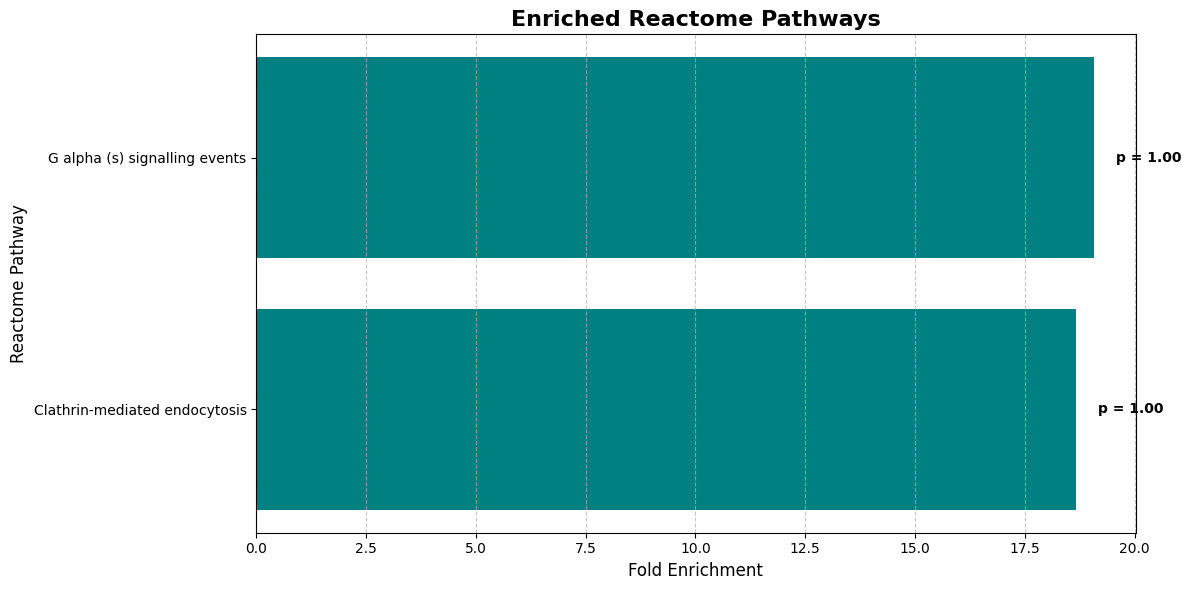

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Plot 1: KEGG Pathway Analysis with P-Value Labels ---

try:
    # Load the KEGG pathway data
    kegg_df = pd.read_csv('kegg.csv')

    # Sort the data for plotting
    kegg_df_sorted = kegg_df.sort_values(by='Fold Enrichment', ascending=True)

    # Create the plot
    plt.figure(figsize=(12, 6)) # Increased width for labels
    bars = plt.barh(
        kegg_df_sorted['Term'],
        kegg_df_sorted['Fold Enrichment'],
        color='mediumpurple'
    )

    # --- NEW: Loop to add P-Value Labels ---
    for index, value in enumerate(kegg_df_sorted['Fold Enrichment']):
        # Get the corresponding Benjamini p-value and format it
        p_value = kegg_df_sorted['Benjamini'].iloc[index]
        label_text = f'p = {p_value:.2f}' # Format to 2 decimal places

        # Add the text label to the right of the bar
        plt.text(value + 0.5, index, label_text, va='center', color='black', fontweight='bold')


    # Add labels and title
    plt.xlabel('Fold Enrichment', fontsize=12)
    plt.ylabel('KEGG Pathway', fontsize=12)
    plt.title('Enriched KEGG Pathways', fontsize=16, fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.savefig('kegg_pathway_plot_with_pvalues.png', dpi=300)
    print("KEGG plot with p-values saved as 'kegg_pathway_plot_with_pvalues.png'")
    plt.show()

except FileNotFoundError:
    print("Error: 'kegg.csv' not found.")


# --- Plot 2: Reactome Pathway Analysis with P-Value Labels ---

try:
    # Load the Reactome pathway data
    reactome_df = pd.read_csv('reactome.csv')

    # Sort the data for plotting
    reactome_df_sorted = reactome_df.sort_values(by='Fold Enrichment', ascending=True)

    # Create the plot
    plt.figure(figsize=(12, 6))
    bars = plt.barh(
        reactome_df_sorted['Term'],
        reactome_df_sorted['Fold Enrichment'],
        color='teal'
    )

    # --- NEW: Loop to add P-Value Labels ---
    for index, value in enumerate(reactome_df_sorted['Fold Enrichment']):
        p_value = reactome_df_sorted['Benjamini'].iloc[index]
        label_text = f'p = {p_value:.2f}'

        plt.text(value + 0.5, index, label_text, va='center', color='black', fontweight='bold')


    # Add labels and title
    plt.xlabel('Fold Enrichment', fontsize=12)
    plt.ylabel('Reactome Pathway', fontsize=12)
    plt.title('Enriched Reactome Pathways', fontsize=16, fontweight='bold')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.savefig('reactome_pathway_plot_with_pvalues.png', dpi=300)
    print("Reactome plot with p-values saved as 'reactome_pathway_plot_with_pvalues.png'")
    plt.show()

except FileNotFoundError:
    print("Error: 'reactome.csv' not found.")